In [410]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy import integrate
import matplotlib as mpl

In [411]:
mpl.rcParams['font.family'] = 'sans-serif'
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [412]:
plt.style.use('seaborn-v0_8')

Solving equations numerically is a useful skill, but was not terribly difficult to code ourselves.  Let’s take the case of the 1d harmonic oscilator

\begin{equation}
\ddot{x}+\gamma \dot{x}+\omega_0^2x=0
\end{equation}
We may re-write the above equation by introducing $\dot{x}=v$ and $\ddot{x}=\dot{v}$. Then above equation becomes,
\begin{align}
\dot{v}+\gamma v+\omega_0^2x=0\\
\dot{v}=-\gamma v-\omega_0^2x
\end{align}

In [413]:
#we define a function that, given a v and x


def v_dot(X,t,gamma=1,omega_0=1): ## X is the array [x,v]
        # notice that we need to use t as an argument even though we don't use it
    return np.array([X[1],-gamma*X[1]-omega_0**2*X[0]]) #return the array dot X defined by our equation

In [414]:
#We now need to know the initial conditions and where we are solving this (this is numerical, so we have to pick some finite amount of time)

t=np.linspace(0,10,100) # range of time we want to solve
X0=[3.,0]     #initial conditions

In [415]:
#we use the basic ODE integrator in scipy

sol=integrate.odeint(v_dot,X0,t)# at this moment gamma=1 and omega_0=1 used

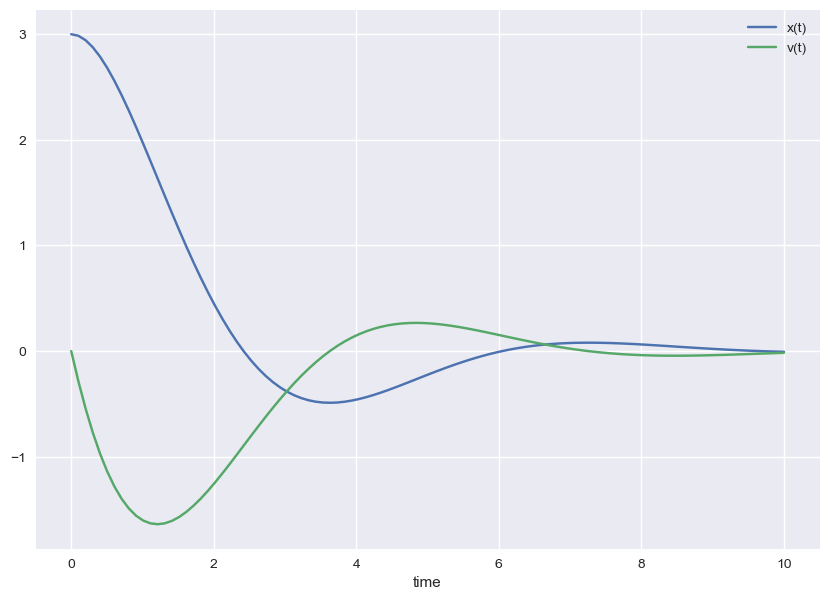

In [416]:
plt.plot(t,sol[:,0], label="x(t)")  # returns solution for X at each point in time  sol[:,0] is x(t)
plt.plot(t,sol[:,1],label="v(t)")  # returns solution for X at each point in time  sol[:,1] is v(t)
plt.legend(loc="best")
plt.xlabel("time")
plt.show()


One way to think about what our odeint is doing is moving our solution through “phase space”, namely (v,x). Time allows us to define a path through this space but we can think of the results as just a curve as so:

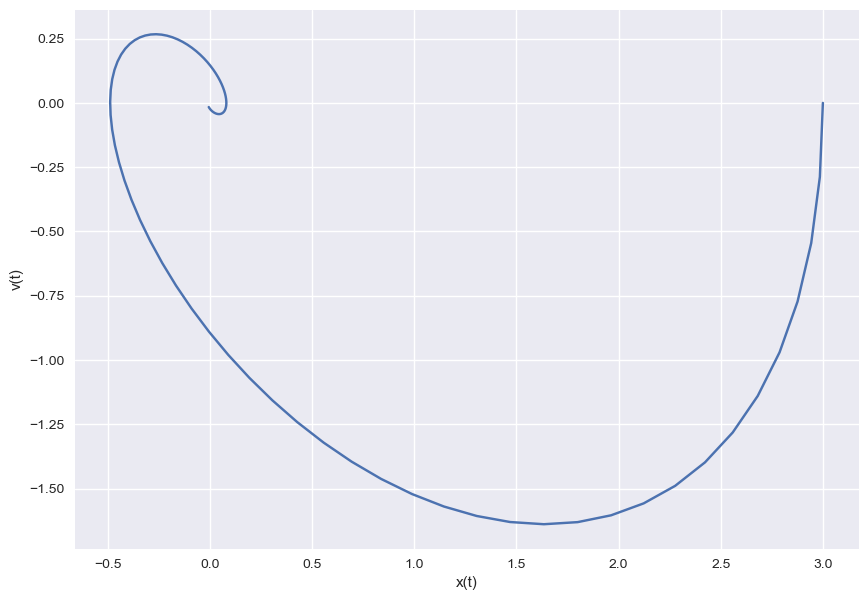

In [417]:
plt.plot(sol[:,0],sol[:,1])  #phase space plot
plt.xlabel("x(t)")
plt.ylabel("v(t)")
plt.show()

you can pass any of the variabels that the function defines. This goes under the “args” option, where we pass this assition infomration

In [418]:
sol_2=integrate.odeint(v_dot,X0,t,args=(2,20)) # now passing gamma=2 and omega_0=20


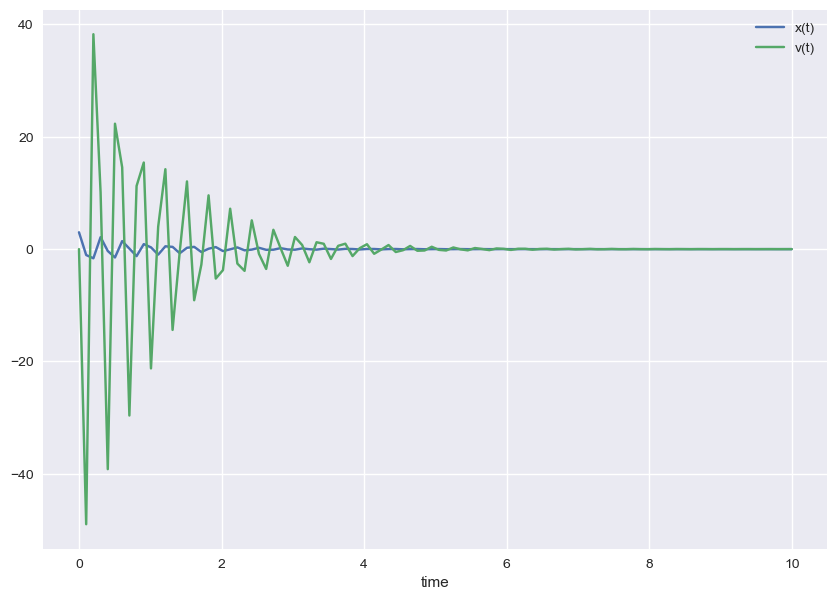

In [419]:
plt.plot(t,sol_2[:,0], label="x(t)")  # returns solution for X at each point in time  sol[:,0] is x(t)
plt.plot(t,sol_2[:,1],label="v(t)")  # returns solution for X at each point in time  sol[:,1] is v(t)
plt.legend(loc="best")
plt.xlabel("time")
plt.show()

In [420]:
sol_3=integrate.odeint(v_dot,X0,t,args=(0,20)) # now passing gamma=0 and omega_0=20


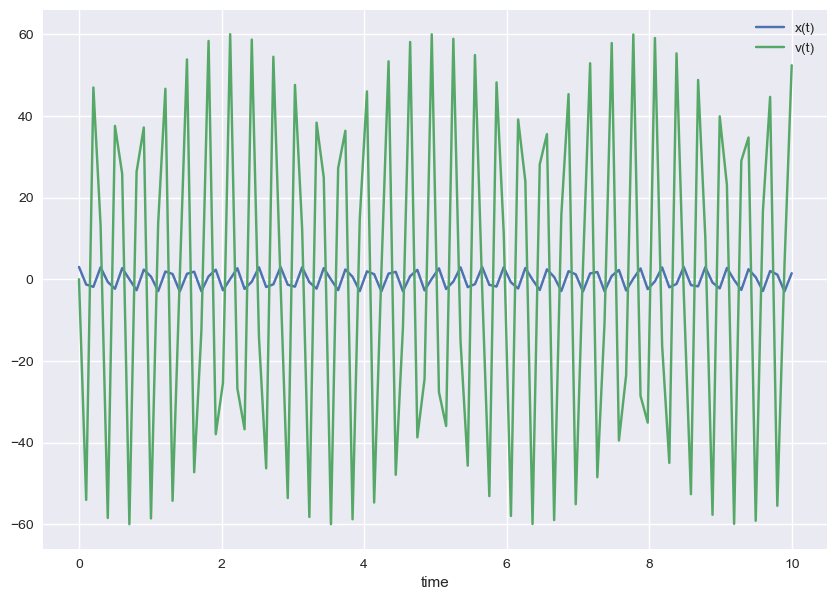

In [421]:
plt.plot(t,sol_3[:,0], label="x(t)")  # returns solution for X at each point in time  sol[:,0] is x(t)
plt.plot(t,sol_3[:,1],label="v(t)")  # returns solution for X at each point in time  sol[:,1] is v(t)
plt.legend(loc="best")
plt.xlabel("time")
plt.show()

Time-dependent coefficients, External Force

In [422]:
def v_dot_new(X,t,gamma=1,omega_0=5,F_ext=10,w_ext=2): ## X is the array [x,v]
        # notice that we need to use t as an argument even though we don't use it
    return [X[1],-gamma*X[1]-omega_0**2*X[0]+F_ext*np.cos(w_ext*t)] ## return the array dot X defined by our equation


In [423]:
time=np.linspace(0,20,200)
sol_new=integrate.odeint(v_dot_new,X0,time) 

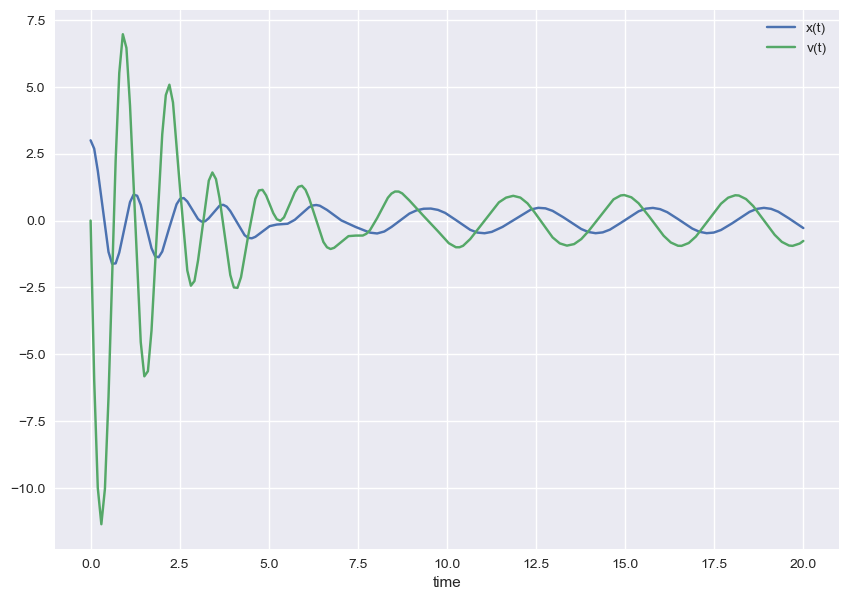

In [424]:
plt.plot(time,sol_new[:,0],label="x(t)")
plt.plot(time,sol_new[:,1],label="v(t)")
plt.xlabel("time")
plt.legend()


Now we want to consider the problem of coupled harmonic oscilators, obeying the equation:

\begin{align}
\ddot{x}+\gamma_x \dot{x}+\omega_x^2(x-y)=0\,\,\Longrightarrow \dot{v}=-\gamma_x v-\omega_x^2(x-y)\\
\ddot{y}+\gamma_y \dot{y}-\omega_y^2(x-y)=0\,\,\Longrightarrow \dot{w}=-\gamma_y w+\omega_y^2(x-y)
\end{align}
Here we have $\dot{x}=v$ and $\dot{y}=w$

In [425]:
def coupled(X,t,gamma_x=1,omega_x=1,gamma_y=1,omega_y=1): # X is the array [x,v,y,w]
        # notice that we need to use t as an argument even though we don't use it
    return [X[1],-gamma_x*X[1]-omega_x**2*(X[0]-X[2]),X[3],-gamma_y*X[3]+omega_y**2*(X[0]-X[2])] # return the coupled equation

In [426]:
t_c=np.linspace(0,10,100) # range of time we want to solve
XC_0=[3.,0,-3.,0]  #initial conditions for v and w

In [427]:
#sol_coupled=integrate.odeint(coupled,XC_0,t_c,args=(1,20,1,10)) # args=(gamma_x,omega_x,gamma_y,omega_y)
sol_coupled=integrate.odeint(coupled,XC_0,t_c) #default args used from function defination

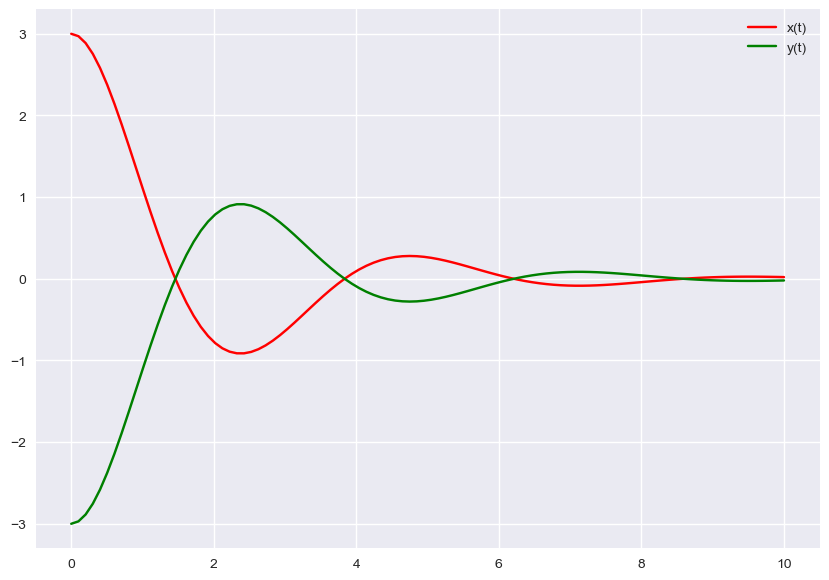

In [428]:
plt.plot(t_c,sol_coupled[:,0],color='red', label="x(t)")
plt.plot(t_c,sol_coupled[:,2], color="green", label="y(t)")
plt.legend()